#### scikit learn简介

    它为各种常用机器学习算法提供了高效版本。 Scikit-Learn
    不仅因其干净、统一、管道命令式的 API 而独具特色，而且它的在线文档又实用、又完
    整。这种统一性的好处是，只要你掌握了 Scikit-Learn 一种模型的基本用法和语法，就可
    以非常平滑地过渡到新的模型或算法上。

scikit-learn的数据表示

**数据表**

In [1]:
import seaborn as sns

iris = sns.load_dataset('iris')
iris.head()

#矩阵的行称为样本，n_samples.
#列数称为特征，记为n_features

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**特征矩阵**

    特征矩阵通常被简记为变量 X。它是维度 为 [n_samples, n_features] 的 二 维 矩 阵

**目标数组**
    
    标数组一般是一维数组，其长度就是样本总数 n_samples，通常都用一维的 NumPy 数组或 Pandas 的
    Series 表示。目标数组可以是连续的数值类型，也可以是离散的类型 / 标签。

/home/liuhao/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


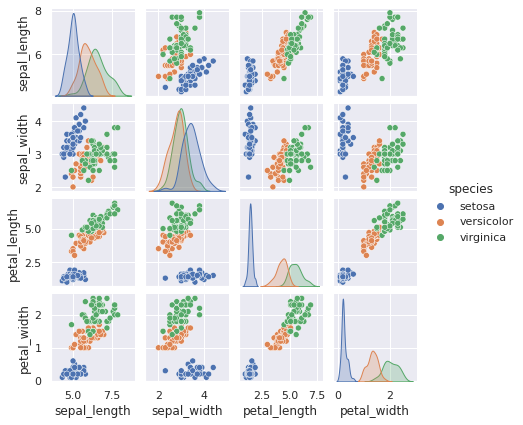

In [2]:
%matplotlib inline
sns.set()
sns.pairplot(iris,hue="species",size=1.5)

In [3]:
X_iris = iris.drop("species",axis=1)
X_iris.shape

(150, 4)

In [5]:
y_iris = iris["species"]
y_iris.shape

(150,)

scikit-learn的评估器API

**API基础知识**

* 通过从 Scikit-Learn 中导入适当的评估器类，选择模型类。
* 用合适的数值对模型类进行实例化，配置模型超参数（hyperparameter）。
* 整理数据，通过前面介绍的方法获取特征矩阵和目标数组。
* 调用模型实例的 fit() 方法对数据进行拟合。
* 对新数据应用模型(监督学习模型通常使用predict方法预测新数据标签，无监督通常使用transform或predict转换或推断数据的性质)

**有监督学习示例：简单线性回归**

In [6]:
import matplotlib.pyplot as plt
import numpy as np

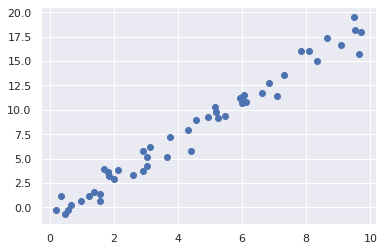

In [7]:
rg = np.random.RandomState(42)
x = 10*rg.rand(50)
y = 2*x-1+rg.randn(50)
plt.scatter(x,y)

In [8]:
#step1 选择模型类
from sklearn.linear_model import LinearRegression

In [10]:
#step2 选择模型超参数
model = LinearRegression(fit_intercept=True)#参数拟合截距设置为True，模型实例化
model#此时并没有将模型应用到数据上


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**不同模型参数配置前需要考虑以下问题:**

* 是否想要拟合偏移量（即直线的截距）
* 是否需要对模型进行归一化处理吗？
* 是否需要对特征进行预处理以提高模型灵活性吗？
* 打算在模型中使用哪种正则化类型？
* 打算使用多少模型组件？

In [12]:
#step3:将数据整理成特征矩阵和目标数组
X  =x[:,np.newaxis]
X.shape

(50, 1)

In [13]:
#step4: 用模型拟合数据
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
#在线性回归模型中，模型参数为截距intecept和斜率coef
model.coef_

array([1.9776566])

In [16]:
model.intercept_

-0.9033107255311146

In [18]:
#step5:预测新数据的标签
x_fit = np.linspace(-1,11)
X_f = x_fit[:,np.newaxis]
y_fit = model.predict(X_f)

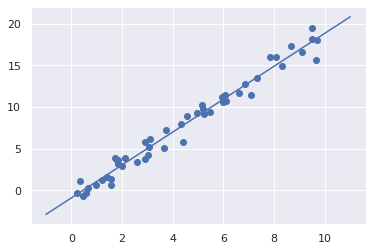

In [19]:
plt.scatter(x,y)
plt.plot(x_fit,y_fit)

**有监督学习示例:鸢尾花数据分类**

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X_iris,y_iris,random_state=1)

In [23]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train,y_train)
y_model = model.predict(X_test)

In [24]:
#auccuracy_score属性验证准确率
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_model)

0.9736842105263158

**无监督学习示例:鸢尾花数据集降维**

In [27]:
#使用pca降维
from sklearn.decomposition import PCA

model = PCA(n_components=2)
model.fit(X_iris)
X_2d = model.transform(X_iris)#将数据转成2维

/home/liuhao/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


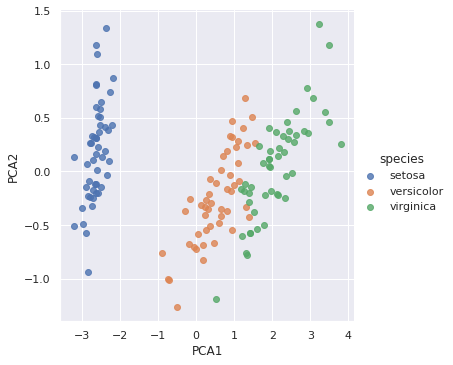

In [29]:
iris['PCA1'] = X_2d[:,0]
iris["PCA2"] = X_2d[:,1]
sns.lmplot("PCA1","PCA2",hue="species",data = iris,fit_reg = False)

**无监督学习示例: 鸢尾花数据聚类**

In [32]:
#高斯混合模型GMM
from sklearn.mixture import GMM

model = GMM(n_components=3,covariance_type='full')
model.fit(X_iris)
y_gmm = model.predict(X_iris)

/home/liuhao/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/liuhao/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/liuhao/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/liuhao/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecatio

/home/liuhao/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


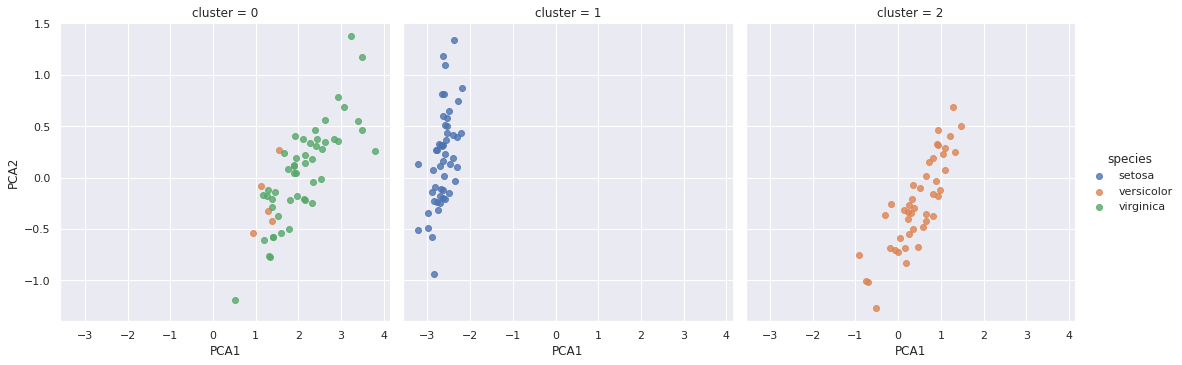

In [33]:
iris["cluster"] = y_gmm
sns.lmplot("PCA1","PCA2",data=iris,hue="species",col="cluster",fit_reg=False)

应用:手写数字探索

**加载并可视化手写数字**

In [34]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.images.shape #1797张图片，每张像素8×8

(1797, 8, 8)

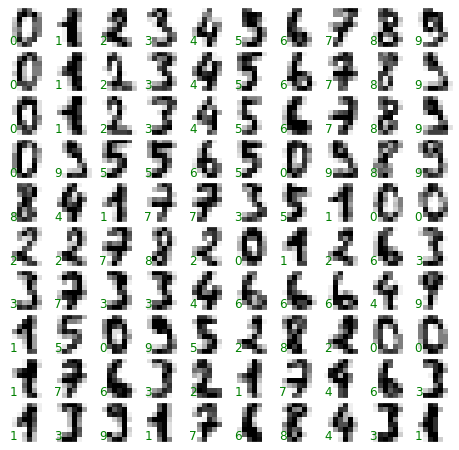

In [36]:
fig,axes  = plt.subplots(10,10,figsize=(8,8),
                        subplot_kw={"xticks":[],'yticks':[]},
                        gridspec_kw=dict(hspace=0.1,wspace=0.1))

for i,ax in enumerate(axes.flat):
    ax.imshow(digits.images[i],cmap="binary",interpolation='nearest')
    ax.text(0.05,0.05,str(digits.target[i]),
           transform = ax.transAxes,color="green")

In [37]:
#创建二维特征矩阵
X  = digits.data
X.shape#1791个样本，64个特征

(1797, 64)

In [39]:
y = digits.target
y.shape

(1797,)

**降维**

In [40]:
from sklearn.manifold import Isomap

iso = Isomap(n_components=2)
iso.fit(digits.data)
data_project  = iso.transform(digits.data)
data_project.shape

(1797, 2)

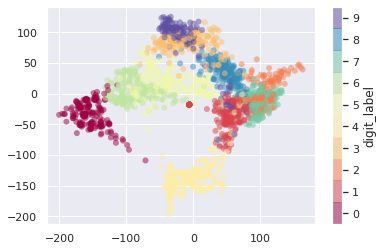

In [46]:
#画出降维后的散点图
plt.scatter(data_project[:,0],data_project[:,1],c = digits.target,
            edgecolor = "none",alpha=0.5,cmap = plt.cm.get_cmap("Spectral",10))
plt.colorbar(label="digit_label",ticks=range(10))
plt.clim(-0.5,9.5)

**数据分类**

In [48]:
X_train,X_test,y_train,y_test  = train_test_split(X,y,random_state=0)

from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train,y_train)
y_model = mdoel.predict(X_test)

(450, 8, 8)

Text(89.18, 0.5, 'true')

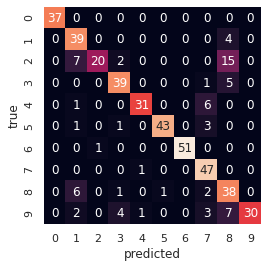

In [52]:
#输出混淆矩阵
from sklearn.metrics import confusion_matrix

cm  = confusion_matrix(y_test,y_model)

sns.heatmap(cm,square=True,annot = True,cbar=False)
plt.xlabel("predicted")
plt.ylabel("true")

#数字2被误判为1或8

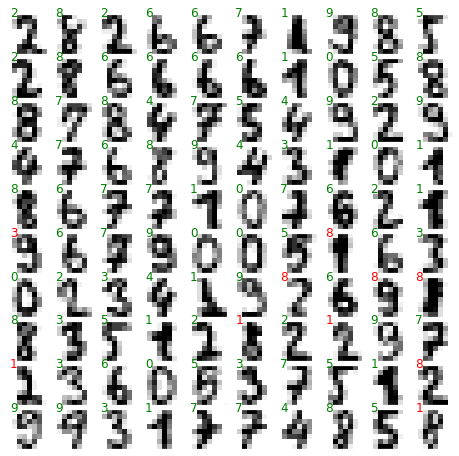

In [57]:
#将预测错误的数字标记出来
fig,axes = plt.subplots(10,10,figsize=(8,8),
                     subplot_kw={"xticks":[],'yticks':[]},
                     gridspec_kw=dict(hspace=0.1,wspace=0.1))

test_images = X_test.reshape(-1,8,8)
for i ,ax in enumerate(axes.flat):
    ax.imshow(test_images[i],cmap="binary",interpolation='nearest')
    ax.text(0.05,0.05,str(y_model[i]),
           
           color = "green" if (y_test[i] == y_model[i]) else "red")

#### 超参数与模型验证


* 选择模型类
* 选择模型超参数
* 用模型拟合训练数据
* 用模型预测新数据的标签

模型验证

**模型验证的正确方法:留出集**

In [62]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors  import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=1)
X = load_iris().data
y = load_iris().target

X1,X2,y1,y2 = train_test_split(X,y,train_size = 0.5,random_state =0)


/home/liuhao/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [63]:
model.fit(X1,y1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [64]:
y2_model = model.predict(X2)#预测没见过的数据集X2
accuracy_score(y2,y2_model)

0.9066666666666666

**交叉验证**

In [65]:
#二轮交叉检验

y2_model = model.fit(X1,y1).predict(X2)
y1_model = model.fit(X2,y2).predict(X1)

accuracy_score(y1,y1_model),accuracy_score(y2,y2_model)
#将二者结合以获取更准确的模型总体性能

(0.96, 0.9066666666666666)

In [66]:
#五轮交叉检验

from sklearn.model_selection import cross_val_score

cross_val_score(model,X,y,cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [72]:
#留一交叉检验LOO 每次只留一个样本做测试，其余样本做训练

from sklearn.model_selection import LeaveOneOut
res = []
loo = LeaveOneOut()
for train, test in loo.split(X):
    train_X, test_X, train_y, test_y = X[train],X[test],y[train],y[test]
    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(train_X,train_y)
    predicted = model.predict(test_X)
    res.extend((predicted == test_y).tolist())

res = np.array(res)  
res

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,

In [73]:
res.mean()

0.96

选择最优模型

*模型效果不好的改善方法:*

* 用更复杂/更灵活的模型
* 用更简单/更确定的模型
* 采集更多的训练样本
* 为每个样本采集更多的特征

**偏差与方差的均衡**

* 高偏差模型在验证集上的表现与在训练集上表现类似
* 高方差模型在验证集上的表现不如在训练集上的表现

*验证曲线的特征*

* 训练得分肯定高于验证得分。一般情况下，模型拟合接触过的数据比拟合没接触过的数据效果要好
* 使用复杂度较低的模型(高偏差)，训练数据往往欠拟合，说明模型对训练数据和新数据都缺乏预测能力
* 使用复杂度较高的模型(高方差),训练数据往往过拟合，说明模型对训练数据预测能力很强，对新数据预测能力很差
* 使用复杂度适中的模型时，验证曲线得分最高，说明在该复杂度条件下，偏差与方差达到均衡状态

**scikit-learn的验证曲线**

In [75]:
#使用带多项式预处理器的简单线性回归模型
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline


In [76]:
def PolynomialRegression(degree=2,**kwargs):
    return make_pipeline(PolynomialFeatures(degree),LinearRegression(**kwargs))

In [77]:
import numpy as np

def make_data(N,err=1.0,rseed = 1):
    
    rg = np.random.RandomState(rseed)
    X = rg.rand(N,1)**2
    y = 10 - 1./ (X.ravel()+0.1) #X.ravel()表示X的视图，意味着如果视图改变则原数组也改变
    if err > 0:
        y += err * rg.randn(N)
    return X,y    

In [78]:
X,y = make_data(40)

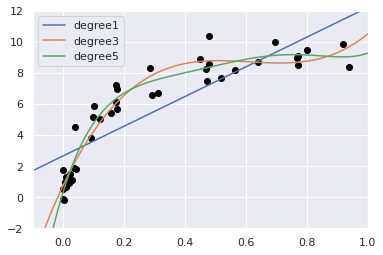

In [83]:
#可视化
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn

seaborn.set()


X_test = np.linspace(-0.1,1.1,500)[:,np.newaxis]
#X_test.shape
plt.scatter(X.ravel(),y,color = "black")
axis=plt.axis()

for degree in [1,3,5]:
    y_test = PolynomialRegression(degree).fit(X,y).predict(X_test)
    plt.plot(X_test.ravel(),y_test,label="degree{0}".format(degree))

plt.xlim(-0.1,1.0)
plt.ylim(-2,12)
plt.legend(loc="best")

#图像描述了不同多项式次数的拟合情况

Text(0, 0.5, 'score')

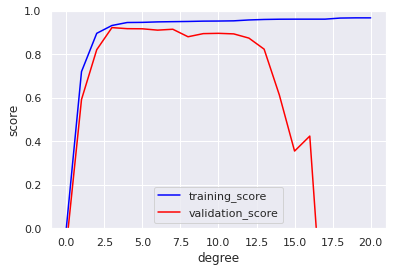

In [87]:
#可视化验证曲线探究多项式次数达到多少时才能在偏差和方差之间平衡

from sklearn.learning_curve import validation_curve

degree  = np.arange(0,21)
train_score,val_score = validation_curve(PolynomialRegression(),X,y,
                                        "polynomialfeatures__degree",
                                        param_range=degree,cv=7)

plt.plot(degree,np.median(train_score,1),color = "blue",label='training_score')
plt.plot(degree,np.median(val_score,1),color = 'red',label = "validation_score")
plt.legend(loc="best")
plt.ylim(0,1)
plt.xlabel("degree")
plt.ylabel("score")


*结论:*

* 训练得分总是高于验证得分
* 训练得分随着模型复杂度的增加单调递增
* 验证得分增长到最高点后由于过拟合开始骤降

(-0.04687651021505175,
 0.9844070023112612,
 -0.7308177116555796,
 10.902869392322714)

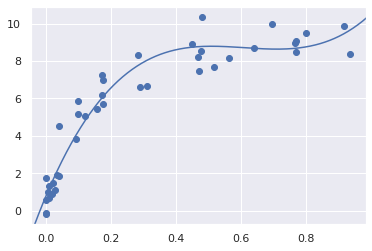

In [88]:
#从验证曲线可以看到多项式为三次时，偏差与方差均衡性最好

plt.scatter(X.ravel(),y)
lim = plt.axis()
y_test = PolynomialRegression(degree=3).fit(X,y).predict(X_test)
plt.plot(X_test.ravel(),y_test)
plt.axis(lim)

学习曲线

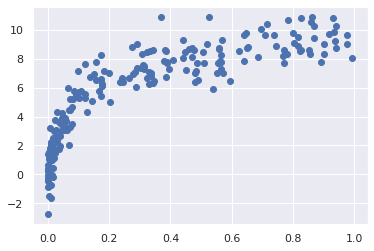

In [89]:
#研究数据量对模型复杂度的影响

X2,y2 = make_data(200)
plt.scatter(X2.ravel(),y2)

Text(0, 0.5, 'score')

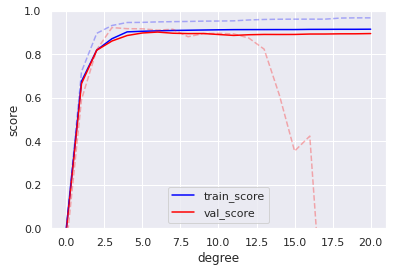

In [94]:
#画出验证曲线

degree = np.arange(21)
train_score2,val_score2 = validation_curve(PolynomialRegression(),X2,y2,
                                         'polynomialfeatures__degree',
                                         param_range=degree,cv=7)

plt.plot(degree,np.median(train_score2,1),color="blue",label = "train_score")
plt.plot(degree,np.median(val_score2,1),color="red",label = "val_score")

plt.plot(degree,np.median(train_score,1),color = "blue",alpha=0.3,linestyle='--')
plt.plot(degree,np.median(val_score,1),color="red",alpha=0.3,linestyle="--")

plt.legend(loc="lower center")
plt.ylim(0,1)
plt.xlabel("degree")
plt.ylabel('score')


*结论*

* 大数据集支持更复杂的模型，最优的多项式次数为6，即使次数为20，过拟合情况依然不明显
* 通过观察验证曲线的变化趋势，模型复杂度和训练数据集规模是影响模型效果的因素

**scikit-learn学习曲线**

    通常，我们将模型看成是与训练数据规模相关的函数，通过不断扩大数据集的规模来拟合模型，以此来观察模型的行
    
    为。反映训练集规模的训练得分 / 验证得分曲线被称为学习曲线

*学习曲线的特征*

* 特定复杂度的模型对较小数据集容易过拟合，此时训练得分较高，验证得分较低
* 特定复杂度的模型对较大数据集容易欠拟合，随着数据增大，训练得分会不断降低，而验证得分会不断升高
* 模型的验证集得分永远不会高于训练集得分，两条曲线一直靠近，但永远不会交叉

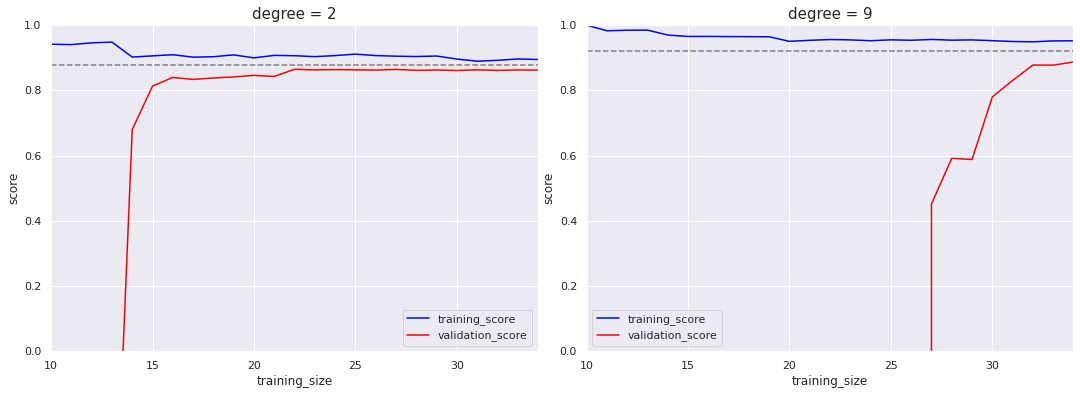

In [100]:
from sklearn.learning_curve import learning_curve

fig,ax = plt.subplots(1,2,figsize=(16,6))
fig.subplots_adjust(left=0.0625,right = 0.95,wspace = 0.1)

for i ,degree in enumerate([2,9]):
    N,train_lc,val_lc = learning_curve(PolynomialRegression(degree),X,y,cv=7,
                                      train_sizes=np.linspace(0.3,1,25))
#N是已用于生成学习曲线的训练样本数    
    ax[i].plot(N,np.mean(train_lc,1),color="blue",label="training_score")
    ax[i].plot(N,np.mean(val_lc,1),color="red",label="validation_score")
    
    ax[i].hlines(np.mean([train_lc[-1],val_lc[-1]]),N[0],N[-1],color="gray",linestyle="--")
    
    ax[i].set_ylim(0,1)
    ax[i].set_xlim(N[0],N[-1])
    ax[i].set_xlabel("training_size")
    ax[i].set_ylabel('score')
    ax[i].set_title("degree = {0}" .format(degree),size=15)
    ax[i].legend(loc="best")

*结论*

* 学习曲线收敛时，再增加训练数据也不能显著改善模型效果
* 采用复杂度更高的模型后，学习曲线的收敛得分(水平虚线)提高了，但模型方差也变大了

验证实践: 网格搜索法

In [101]:
from sklearn.grid_search import GridSearchCV

param_grid = {"polynomialfeatures__degree":np.arange(21),
              "linearregression__fit_intercept":[True,False],
              "linearregression__normalize":[True,False]}
grid = GridSearchCV(PolynomialRegression(),param_grid,cv=7)

/home/liuhao/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [102]:
grid.fit(X,y) #在每个网格点拟合模型，并记录每个点的得分

GridSearchCV(cv=7, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'polynomialfeatures__degree': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20]), 'linearregression__fit_intercept': [True, False], 'linearregression__normalize': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [103]:
#获取最优参数
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

(-0.04687651021505175,
 0.9844070023112612,
 -0.7308177116555796,
 10.902869392322714)

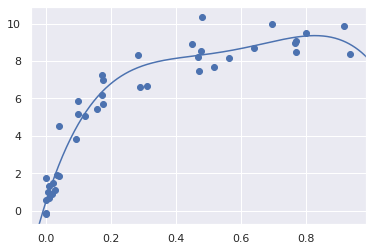

In [105]:
#用最优的参数的模型拟合数据

model = grid.best_estimator_ #获得最优参数的模型

plt.scatter(X.ravel(),y)
lim = plt.axis()
y_test = model.fit(X,y).predict(X_test)
plt.plot(X_test.ravel(),y_test)
plt.axis(lim)

#### 特征工程

分类特征

In [106]:
data = [
        {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
        {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
        {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
        {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
       ]

In [108]:
#将上面字典列表中的neighborhood变量独热编码
from sklearn.feature_extraction import DictVectorizer

vec= DictVectorizer(sparse = False,dtype=int)
vec.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]])

In [109]:
#获取每一列的含义
vec.get_feature_names()

['neighborhood=Fremont',
 'neighborhood=Queen Anne',
 'neighborhood=Wallingford',
 'price',
 'rooms']

In [110]:
#当分类特征有多个枚举值时，数据维度会急剧增加且含有许多0，因此用稀疏矩阵表示很高效
vec = DictVectorizer(sparse = True ,dtype=int)
vec.fit_transform(data)

<4x5 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

文本特征

In [112]:
#单词统计

sample = ["problem of evil",
          "evil queen",
          "horizen problem"]

In [114]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X  = vec.fit_transform(sample)
X

#返回一个稀疏矩阵的对象

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [117]:
#TF-idf通过单词在文档中出现的频率获得每个词的权重，用dataframe展示稀疏矩阵
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(),columns = vec.get_feature_names())

,evil,horizen,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


图像特征

衍生特征

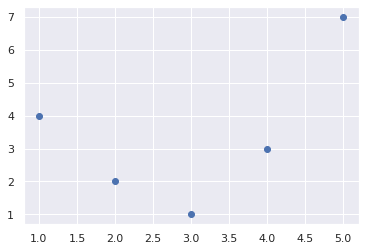

In [118]:
#多项式特征构造

x  = np.array([1,2,3,4,5])
y  = np.array([4,2,1,3,7])
plt.scatter(x,y)

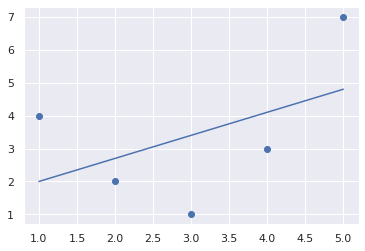

In [119]:
X = x[:,np.newaxis]

model = LinearRegression().fit(X,y)
y_pre = model.predict(X)
plt.scatter(x,y)
plt.plot(x,y_pre)

In [120]:
#对数据变换，不增加额外特征提升复杂度

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3,include_bias=  False)
X2 = poly.fit_transform(X)
print(X2)

#第一列是x,第二列x^2,第三列x^3

[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


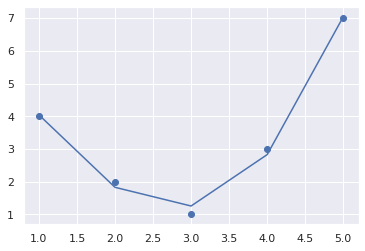

In [123]:
model = LinearRegression().fit(X2,y)
y_pre = model.predict(X2)
plt.scatter(x,y)
plt.plot(x,y_pre)

缺失值填充

In [124]:
from numpy import nan

#sample
X= np.array([[nan,0,3],
             [3,7,9],
             [3,5,2],
             [4,nan,6],
             [8,8,1]])
y = np.array([14,16,-1,0,-5])


In [125]:
#使用Imputer类实现

from sklearn.preprocessing import Imputer
imp = Imputer(strategy = "mean") #缺失值由缺失值所在列的其他数值之和除以非nan个数计算得到
X2 = imp.fit_transform(X)
X2

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

In [126]:
model = LinearRegression().fit(X2,y)
model.predict(X2)

array([11.5050478 , 11.2477101 , -1.45542778,  8.69273027, -5.9900604 ])

特征管道

In [128]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(Imputer(strategy = "mean"),
                     PolynomialFeatures(degree=3),
                     LinearRegression())

In [129]:
#任何数据进行管道内所有操作的处理
model.fit(X,y)
print(y)
print(model.predict(X))

[14 16 -1  0 -5]
[ 1.40000000e+01  1.60000000e+01 -1.00000000e+00 -2.22044605e-14
 -5.00000000e+00]
